<a href="https://colab.research.google.com/github/vindhya1103/GenAI/blob/main/GAI_Exp5_Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Experiment 5**

Implement Autoencoder architecture for denoising images.

## Description

Denoising Autoencoder

<img src='https://miro.medium.com/max/700/1*SxwRp9i23OM0Up4sEze1QQ@2x.png' width=70%>

## Program


### Import Dataset

In [ ]:
import tensorflow
from tensorflow.keras.datasets import mnist     # MNIST dataset is included in Keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


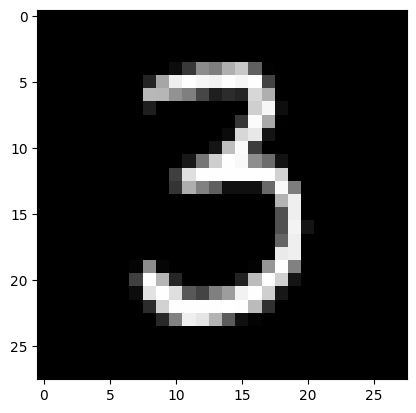

In [ ]:
# Visualize any random image
import matplotlib.pyplot as plt
i=50;
plt.imshow(X_train[i], cmap='gray');

### Formatting the Input

In [ ]:
# reshape 28 x 28 matrices into 784-length vectors
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

# normalize each value for each pixel for the entire vector for each input
# change integers to 32-bit floating point numbers
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize by dividing by largest pixel value
X_train /= 255
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [ ]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input

### Create noisy data

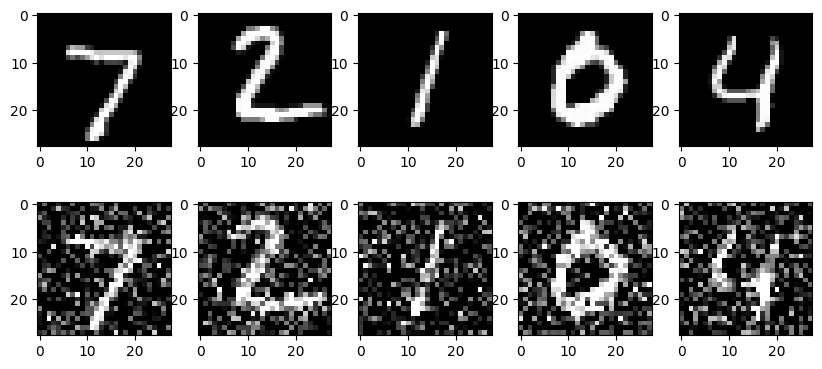

In [ ]:
# Add noise to input
import numpy as np

noise_factor = 0.4
X_train_noisy = X_train + noise_factor * np.random.normal(size=X_train.shape)
X_test_noisy  = X_test  + noise_factor * np.random.normal(size=X_test.shape)

X_train_noisy= np.clip(X_train_noisy, 0.0, 1.0)
X_test_noisy = np.clip(X_test_noisy , 0.0, 1.0)

n = 5
plt.figure(figsize=(10, 4.5))
for i in range(n):
    # plot original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    if i == n/2:
        ax.set_title('Original Images')

    # plot noisy image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    if i == n/2:
        ax.set_title('Noisy Input')

### Design and train Fully-connected DAE

Reference: https://www.analyticsvidhya.com/blog/2021/07/image-denoising-using-autoencoders-a-beginners-guide-to-deep-learning-project/

In [ ]:
input_size = 784
hidden_size = 128
code_size = 32
# Complete the code

# Input layer
input_img=Input(shape=(input_size,))
hidden_1=Dense(hidden_size, activation='relu')(input_img)
code=Dense(code_size, activation='relu')(hidden_1)
hidden_2=Dense(hidden_size, activation='relu')(code)
output_img=Dense(input_size, activation='sigmoid')(hidden_2)

DAE=Model(input_img, output_img)
DAE.compile(optimizer='adam', loss='mean_squared_error')
DAE.fit(X_train_noisy, X_train, epochs=25)
DAE.summary()

Epoch 1/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0341
Epoch 2/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0216
Epoch 3/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0193
Epoch 4/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0181
Epoch 5/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0174
Epoch 6/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0168
Epoch 7/25
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0164
Epoch 8/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0161
Epoch 9/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0158
Epoch 10/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0156
Epoch 11/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0154
Epoch 12/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0152
E

In [ ]:
# Reconstruct Images from Noisy X_test images
X_test_noisy_recons = DAE.predict(X_test_noisy)

313/313 [==============================] - 0s 1ms/step


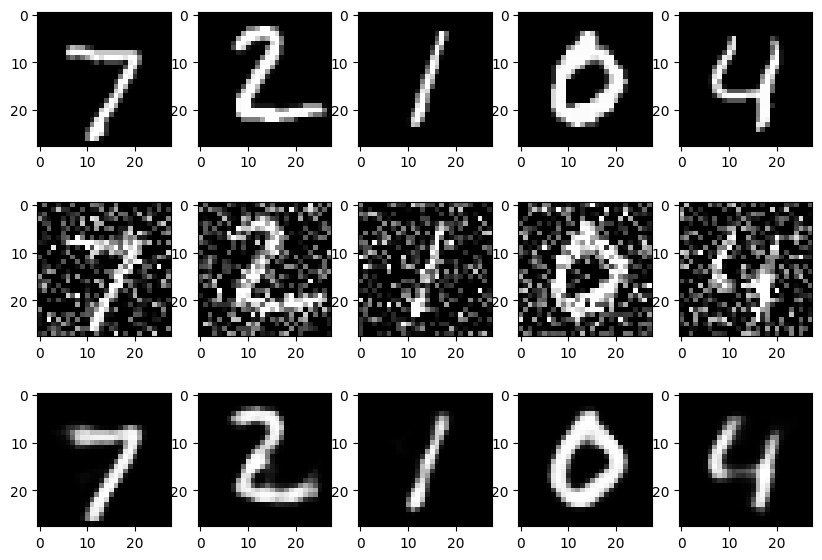

In [ ]:
n = 5
plt.figure(figsize=(10, 7))
for i in range(n):
    # plot original image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    if i == n/2:
        ax.set_title('Original Images')

    # plot noisy image
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    if i == n/2:
        ax.set_title('Noisy Input')

    # plot noisy image
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(X_test_noisy_recons[i].reshape(28, 28))
    plt.gray()
    if i == n/2:
        ax.set_title('Autoencoder Output')

## Conclusion